In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Dataset DIM_Tienda base

In [3]:
from google.colab import drive
drive.mount('/content/drive')
df_tienda = pd.read_csv('/content/drive/MyDrive/DatasetsOxxo/DIM_TIENDA.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


FileNotFoundError: [Errno 2] No such file or directory: 'MyDrive/DatasetsOxxo/DIM_TIENDA.csv'

## Descripciones


Head

In [ ]:
df_tienda.head()

,TIENDA_ID,PLAZA_CVE,NIVELSOCIOECONOMICO_DES,ENTORNO_DES,MTS2VENTAS_NUM,PUERTASREFRIG_NUM,CAJONESESTACIONAMIENTO_NUM,LATITUD_NUM,LONGITUD_NUM,SEGMENTO_MAESTRO_DESC,LID_UBICACION_TIENDA,DATASET
0,126,1,BC,Hogar,127.42,13,7,25.69107,-100.21261,Hogar Reunión,UT_DENSIDAD,TRAIN
1,681,1,C,Hogar,128.13,13,0,25.73571,-100.18086,Hogar Reunión,UT_DENSIDAD,TRAIN
2,117,1,C,Base,87.62,11,11,25.71883,-100.19133,Hogar Reunión,UT_DENSIDAD,TRAIN
3,682,1,C,Hogar,90.70,13,0,25.66952,-100.20744,Hogar Reunión,UT_DENSIDAD,TRAIN
4,275,1,C,Hogar,95.30,13,6,25.73766,-100.16116,Hogar Reunión,UT_DENSIDAD,TRAIN


Informacion de la cantidad de nulos

In [ ]:
df_tienda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 951 entries, 0 to 950
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   TIENDA_ID                   951 non-null    int64  
 1   PLAZA_CVE                   951 non-null    int64  
 2   NIVELSOCIOECONOMICO_DES     951 non-null    object 
 3   ENTORNO_DES                 951 non-null    object 
 4   MTS2VENTAS_NUM              951 non-null    float64
 5   PUERTASREFRIG_NUM           951 non-null    int64  
 6   CAJONESESTACIONAMIENTO_NUM  951 non-null    int64  
 7   LATITUD_NUM                 951 non-null    float64
 8   LONGITUD_NUM                951 non-null    float64
 9   SEGMENTO_MAESTRO_DESC       944 non-null    object 
 10  LID_UBICACION_TIENDA        951 non-null    object 
 11  DATASET                     951 non-null    object 
dtypes: float64(3), int64(4), object(5)
memory usage: 89.3+ KB


Datos estadisticos de todas las variables

In [ ]:
df_tienda.describe(include='all')

,TIENDA_ID,PLAZA_CVE,NIVELSOCIOECONOMICO_DES,ENTORNO_DES,MTS2VENTAS_NUM,PUERTASREFRIG_NUM,CAJONESESTACIONAMIENTO_NUM,LATITUD_NUM,LONGITUD_NUM,SEGMENTO_MAESTRO_DESC,LID_UBICACION_TIENDA,DATASET
count,951.000000,951.000000,951,951,951.000000,951.000000,951.000000,951.000000,951.000000,944,951,951
unique,NaN,NaN,7,4,NaN,NaN,NaN,NaN,NaN,5,5,1
top,NaN,NaN,C,Hogar,NaN,NaN,NaN,NaN,NaN,Hogar Reunión,UT_DENSIDAD,TRAIN
freq,NaN,NaN,670,576,NaN,NaN,NaN,NaN,NaN,609,532,951
mean,528.334385,3.431125,NaN,NaN,78.897455,9.468980,4.023134,25.652158,-99.516199,NaN,NaN,NaN
std,305.192981,1.754765,NaN,NaN,51.412302,5.038675,4.717436,1.206889,4.636333,NaN,NaN,NaN
min,1.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,-100.438490,NaN,NaN,NaN
25%,264.500000,2.000000,NaN,NaN,0.000000,10.000000,0.000000,25.631635,-100.218685,NaN,NaN,NaN
50%,528.000000,3.000000,NaN,NaN,102.870000,12.000000,0.000000,25.679300,-100.135890,NaN,NaN,NaN
75%,792.500000,5.000000,NaN,NaN,115.200000,13.000000,9.000000,25.806355,-99.572580,NaN,NaN,NaN


In [ ]:
# Seleccionar solo columnas tipo object (categóricas)
columnas_object = df_tienda.select_dtypes(include='object').columns

# Para cada columna, imprimir sus valores únicos y su frecuencia
for col in columnas_object:
    print(f"\n📌 Columna: {col}")
    print(df_tienda[col].value_counts(dropna=False))  # Incluye NaN si los hay



📌 Columna: NIVELSOCIOECONOMICO_DES
NIVELSOCIOECONOMICO_DES
C     662
B      91
BC     73
CD     61
AB     31
D      16
A       8
Name: count, dtype: int64

📌 Columna: ENTORNO_DES
ENTORNO_DES
Hogar       572
Base        226
Receso      137
Peatonal      7
Name: count, dtype: int64

📌 Columna: SEGMENTO_MAESTRO_DESC
SEGMENTO_MAESTRO_DESC
Hogar Reunión       608
Parada Técnica      142
Oficinistas          96
Clásico              69
Barrio Competido     27
Name: count, dtype: int64

📌 Columna: LID_UBICACION_TIENDA
LID_UBICACION_TIENDA
UT_DENSIDAD             528
UT_TRAFICO_VEHICULAR    213
UT_GAS_URBANA           102
UT_CARRETERA_GAS         55
UT_TRAFICO_PEATONAL      44
Name: count, dtype: int64

📌 Columna: DATASET
DATASET
TRAIN    942
Name: count, dtype: int64


In [ ]:
filas_con_nulos = df_tienda[df_tienda.isnull().any(axis=1)]

print("Filas con valores nulos:")
filas_con_nulos

Filas con valores nulos:


,TIENDA_ID,PLAZA_CVE,NIVELSOCIOECONOMICO_DES,ENTORNO_DES,MTS2VENTAS_NUM,PUERTASREFRIG_NUM,CAJONESESTACIONAMIENTO_NUM,LATITUD_NUM,LONGITUD_NUM,SEGMENTO_MAESTRO_DESC,LID_UBICACION_TIENDA,DATASET
430,767,3,C,Base,0.00,0,0,25.67365,-100.27490,NaN,UT_TRAFICO_VEHICULAR,TRAIN
536,829,4,C,Hogar,115.45,14,0,25.65830,-100.09820,NaN,UT_DENSIDAD,TRAIN
736,772,5,C,Hogar,89.60,15,0,25.79316,-100.18115,NaN,UT_DENSIDAD,TRAIN
890,818,6,C,Receso,0.00,0,0,25.56875,-99.98240,NaN,UT_CARRETERA_GAS,TRAIN
900,786,6,C,Hogar,0.00,0,0,25.28290,-100.00320,NaN,UT_DENSIDAD,TRAIN
928,768,6,C,Base,0.00,0,0,25.35691,-100.09469,NaN,UT_TRAFICO_VEHICULAR,TRAIN
933,761,6,B,Receso,0.00,0,0,25.48700,-100.18330,NaN,UT_CARRETERA_GAS,TRAIN


Cantidad de ceros por columna

In [ ]:
# Contar cuántos ceros hay en cada columna
conteo_ceros = (df_tienda == 0).sum()

# Mostrar solo columnas que tienen al menos un cero
conteo_ceros = conteo_ceros[conteo_ceros > 0]

# Imprimir resultados
print("Cantidad de ceros por columna:")
conteo_ceros



Cantidad de ceros por columna:


,0
MTS2VENTAS_NUM,267
PUERTASREFRIG_NUM,197
CAJONESESTACIONAMIENTO_NUM,517
LATITUD_NUM,2
LONGITUD_NUM,2


### Limpieza de datos

Ubicacion geografica que es 0, segmento maestro era Nan

In [ ]:
# Filtrar filas donde LATITUD_NUM y LONGITUD_NUM no sean cero
df_tienda = df_tienda[(df_tienda['LATITUD_NUM'] != 0) & (df_tienda['LONGITUD_NUM'] != 0)]

# Quitar filas donde SEGMENTO_MAESTRO_DESC es NaN
df_tienda = df_tienda[df_tienda['SEGMENTO_MAESTRO_DESC'].notnull()]

# Mostrar cuántas filas quedaron
print(f"Filas restantes después de limpiar: {len(df_tienda)}")

Filas restantes después de limpiar: 942


In [ ]:
# Contar cuántos ceros hay en cada columna
conteo_ceros = (df_tienda == 0).sum()

# Mostrar solo columnas que tienen al menos un cero
conteo_ceros = conteo_ceros[conteo_ceros > 0]

# Imprimir resultados
print("Cantidad de ceros por columna:")
conteo_ceros


Cantidad de ceros por columna:


,0
MTS2VENTAS_NUM,260
PUERTASREFRIG_NUM,190
CAJONESESTACIONAMIENTO_NUM,508


### Matriz de correlacion previo a imputacion

Matriz de correlación:
                            TIENDA_ID  PLAZA_CVE  MTS2VENTAS_NUM  \
TIENDA_ID                    1.000000  -0.286258       -0.075214   
PLAZA_CVE                   -0.286258   1.000000       -0.199382   
MTS2VENTAS_NUM              -0.075214  -0.199382        1.000000   
PUERTASREFRIG_NUM           -0.329439  -0.027491        0.538519   
CAJONESESTACIONAMIENTO_NUM   0.086750  -0.265084        0.542141   
LATITUD_NUM                  0.529565  -0.566472        0.149538   
LONGITUD_NUM                 0.565826  -0.305174       -0.014740   

                            PUERTASREFRIG_NUM  CAJONESESTACIONAMIENTO_NUM  \
TIENDA_ID                           -0.329439                    0.086750   
PLAZA_CVE                           -0.027491                   -0.265084   
MTS2VENTAS_NUM                       0.538519                    0.542141   
PUERTASREFRIG_NUM                    1.000000                    0.264509   
CAJONESESTACIONAMIENTO_NUM           0.264509  

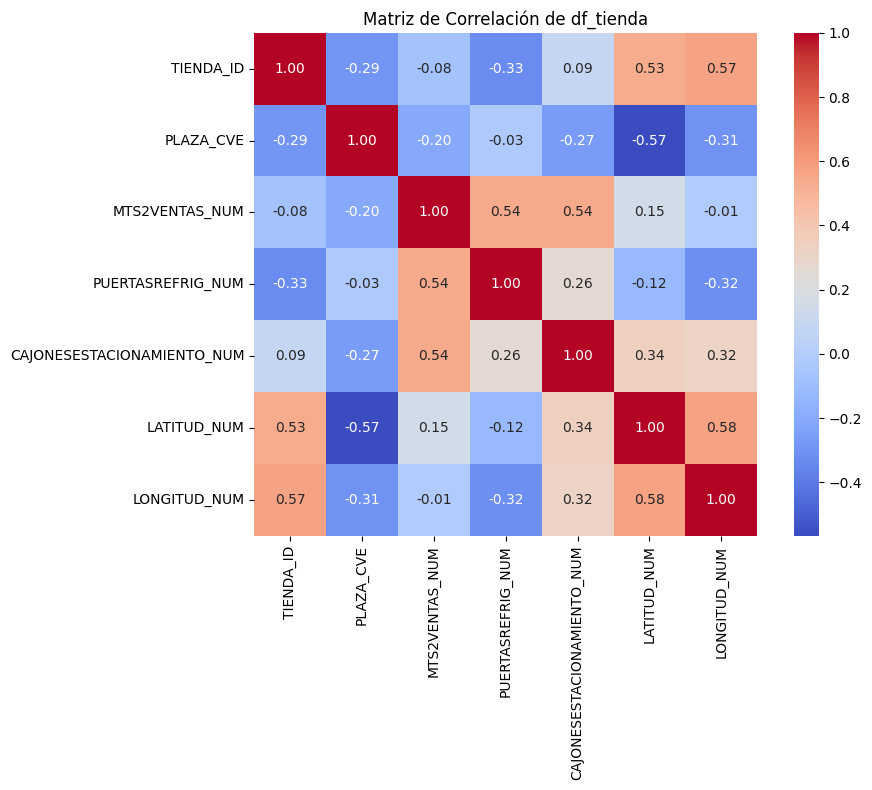

In [ ]:
# Calcular la matriz de correlación solo con columnas numéricas
correlacion = df_tienda.corr(numeric_only=True)

# Mostrar la matriz numérica
print("Matriz de correlación:")
print(correlacion)

# Graficar el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Matriz de Correlación de df_tienda")
plt.tight_layout()
plt.show()

# DATASET donde no hay datos cero en Metros Cuadrados, Estacionamiento y Refris


In [ ]:
df_tienda_no_cero = df_tienda[df_tienda['MTS2VENTAS_NUM'] != 0]
df_tienda_no_cero = df_tienda_no_cero[df_tienda_no_cero['CAJONESESTACIONAMIENTO_NUM'] != 0]
df_tienda_no_cero = df_tienda_no_cero[df_tienda_no_cero['PUERTASREFRIG_NUM'] != 0]
conteo_ceros = (df_tienda_no_cero == 0).sum()
conteo_ceros = conteo_ceros[conteo_ceros > 0]
print("Cantidad de ceros por columna:")
print(conteo_ceros)



Cantidad de ceros por columna:
Series([], dtype: int64)


### Matriz de correlacion sin contemplar ningun 0 en las columnas anteriores

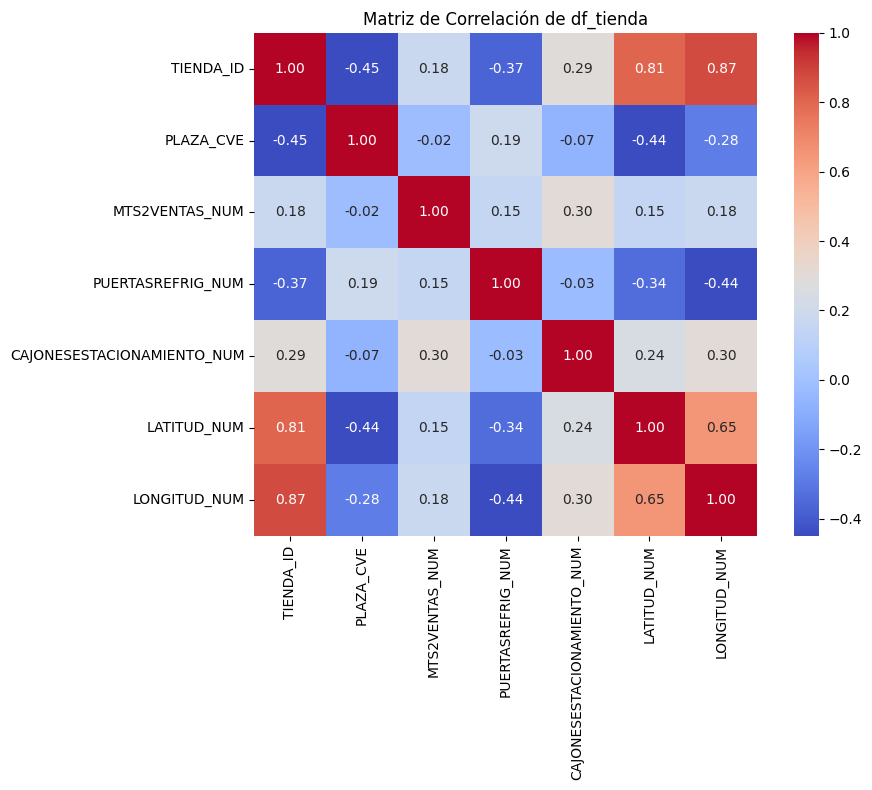

In [ ]:
# Calcular la matriz de correlación solo con columnas numéricas
correlacion = df_tienda_no_cero.corr(numeric_only=True)
# Graficar el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Matriz de Correlación de df_tienda")
plt.tight_layout()
plt.show()

## Imputacion de datos en el DATASET sin valores nulos

In [ ]:
# Paso 1: Reemplazar ceros por NaN donde tenga sentido
df_tienda['MTS2VENTAS_NUM'] = df_tienda['MTS2VENTAS_NUM'].replace(0, np.nan)

# Paso 2: Definir columnas predictoras (puedes ajustar según tus datos)
features = ['PUERTASREFRIG_NUM', 'CAJONESESTACIONAMIENTO_NUM', 'LATITUD_NUM', 'LONGITUD_NUM', 'ENTORNO_DES']

# Paso 3: Filtrar filas válidas para entrenamiento (no tener ceros en puertas ni cajones, ni nulos en target)
entrenamiento = df_tienda[
    (df_tienda['MTS2VENTAS_NUM'].notnull()) &
    (df_tienda['PUERTASREFRIG_NUM'] != 0) &
    (df_tienda['CAJONESESTACIONAMIENTO_NUM'] != 0)
]

# Paso 4: Separar X e y
X_train = entrenamiento[features]
y_train = entrenamiento['MTS2VENTAS_NUM']

# Paso 5: Preparar preprocesamiento (OneHot para categoricas)
preprocesador = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['ENTORNO_DES'])
    ],
    remainder='passthrough'
)

# Paso 6: Pipeline con RandomForest
modelo = Pipeline(steps=[
    ('preprocesamiento', preprocesador),
    ('regresor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Paso 7: Entrenar el modelo
modelo.fit(X_train, y_train)

# Paso 8: Predecir para los que tienen MTS2VENTAS_NUM como cero o NaN
filtro_a_imputar = df_tienda['MTS2VENTAS_NUM'].isnull()
X_pred = df_tienda.loc[filtro_a_imputar, features]

# Predecir y rellenar
df_tienda.loc[filtro_a_imputar, 'MTS2VENTAS_NUM'] = modelo.predict(X_pred)

### Conteno de ceros despues de imputacion

In [ ]:
# Contar cuántos ceros hay en cada columna
conteo_ceros = (df_tienda == 0).sum()

# Mostrar solo columnas que tienen al menos un cero
conteo_ceros = conteo_ceros[conteo_ceros > 0]

# Imprimir resultados
print("Cantidad de ceros por columna:")
conteo_ceros


Cantidad de ceros por columna:


,0
PUERTASREFRIG_NUM,190
CAJONESESTACIONAMIENTO_NUM,508


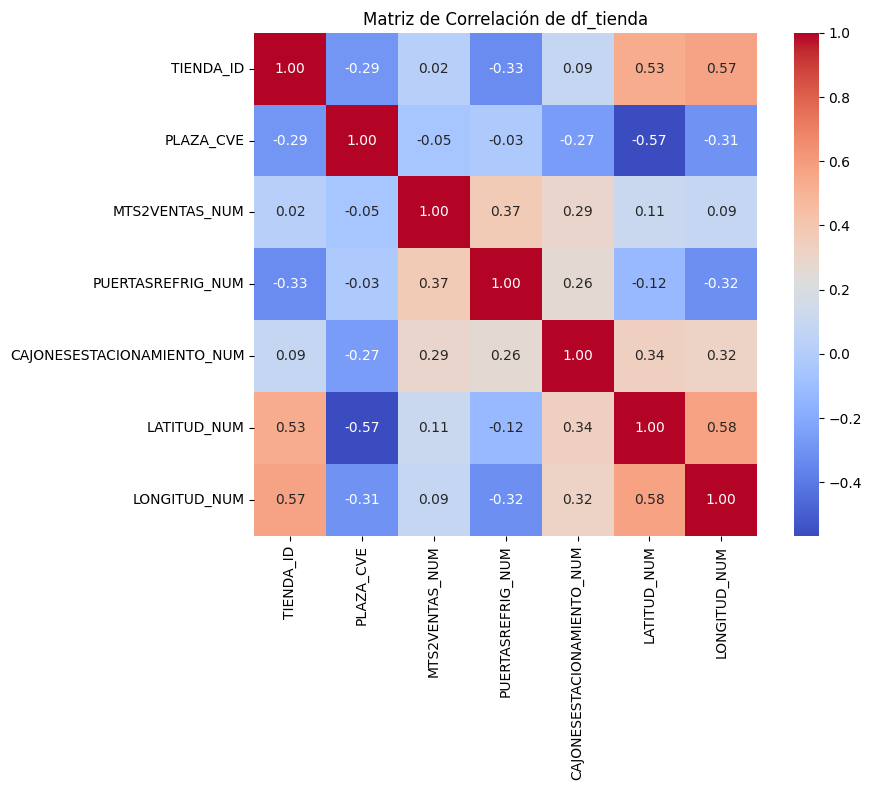

In [ ]:
# Calcular la matriz de correlación solo con columnas numéricas
correlacion = df_tienda.corr(numeric_only=True)
# Graficar el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Matriz de Correlación de df_tienda")
plt.tight_layout()
plt.show()